In [285]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from jupyterthemes import jtplot
from sklearn.metrics import auc, roc_curve, roc_auc_score
%matplotlib inline
#jtplot.style()
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) # display all columns
#pd.set_option('display.max_rows', None) # display all columns

import math
import gc
import os
import logging
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
#import lightgbm as lgb
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
import xgboost
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA, KernelPCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
!ls

 test.csv    train_df_mean     Untitled4.ipynb	'Тестовое задание.docx'
 test_df     Untitled1.ipynb   Untitled.ipynb
 train.csv   Untitled2.ipynb   X_train_mean
 train_df    Untitled3.ipynb   y_train.csv


In [3]:
train_df=pd.read_csv('train.csv')

In [5]:
test_df=pd.read_csv('test.csv')

In [6]:
train_y=pd.read_csv('y_train.csv')

In [7]:
train_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58
0,"-131,97405146667",12.0,"13,0",11.747860,1.0,2.0,"22,0","-27,750277493704",9.0,NaN,87.058083,"21,450413763523102",81.620517,-97.553036,16.0,-12.983080,"17,0",4.0,-18.099378,-6.732951,"4,0",5.0,1.0,5.0,"-17,9129890591338",12.0,11.0,51.471043,3.0,0.0,3.0,"2,0",18.831498,66.396910,-37.168058,NaN,4.046918,NaN,"-44,375920543996706",18.004199,-30.673090,3.361101,40.974956,0.0,11.0,-87.278260,"0,0",4.0,12.459805,3.0,"11,0",40.588345,16.957673,14.360604,"-53,415701398274706",NaN,NaN,-40.849368
1,"-48,3041715861774",9.0,"10,0",10.436009,1.0,NaN,"24,0","-25,703719919085497",8.0,0.0,16.009612,"-72,79126783832909",-6.461447,-57.383471,17.0,-16.861284,"17,0",3.0,16.198657,NaN,"4,0",2.0,1.0,NaN,"41,7047788312104",16.0,NaN,34.587850,NaN,1.0,5.0,"1,0",5.274965,143.517414,-31.440045,3.0,2.018794,31.639457,"-22,766313763779998",-34.725224,45.854345,2.832861,26.454657,0.0,10.0,-5.220776,"0,0",5.0,27.542202,2.0,NaN,27.113802,-61.457339,2.627029,"-39,6179932194784",24.686063,NaN,-45.108764
2,"100,069773659861",13.0,"11,0",18.929141,0.0,3.0,"23,0","-4,699424954438241",9.0,0.0,75.464985,"38,530414272099705",-35.334847,-74.046007,NaN,-7.208878,"16,0",NaN,-31.089034,10.123315,"5,0",6.0,3.0,7.0,"10,8242838031359",13.0,8.0,49.093965,1.0,NaN,4.0,"6,0",20.984751,84.880973,-70.628745,NaN,1.217633,105.329939,"-29,320117178615497",1.742056,12.218403,-2.028582,49.873473,1.0,11.0,-98.563257,"0,0",3.0,18.594894,3.0,"16,0",-6.896243,54.733047,-2.216517,"-35,2871838640482",25.040067,NaN,-47.242583
3,"-25,5087416417462",13.0,"12,0",46.259050,0.0,3.0,"23,0","1,2425417539191599",8.0,1.0,-114.959430,NaN,NaN,-113.523562,16.0,-3.478059,"17,0",6.0,-0.291220,-30.995198,"8,0",3.0,1.0,NaN,"39,1266106064488",17.0,12.0,48.913728,1.0,2.0,4.0,"3,0",4.363940,85.951710,-71.353546,3.0,0.331994,NaN,"-16,741315467876998",NaN,-25.815625,-1.133774,44.798576,1.0,NaN,-0.554252,"0,0",NaN,20.084705,2.0,"15,0",55.000612,-4.505556,38.156216,"-1,7639836715336101",34.969627,46.036218,-33.329253
4,"82,3194077384192",11.0,NaN,56.106711,NaN,2.0,"23,0","-55,3530578444829",7.0,0.0,-15.661521,"-64,498249348253",NaN,-109.187610,17.0,2.200664,"17,0",3.0,-72.580830,18.359769,"8,0",7.0,2.0,7.0,NaN,NaN,11.0,41.238975,3.0,0.0,3.0,"3,0",11.930483,110.830770,-38.291125,3.0,0.185845,60.799044,"-13,473520432564198",9.043501,12.348260,2.928347,NaN,1.0,10.0,-52.169032,"0,0",4.0,22.172242,2.0,"12,0",16.842511,-7.187769,60.228568,"-59,8615288163502",36.044706,36.613905,-10.534727


In [8]:
train_df.shape,test_df.shape

((720000, 58), (180000, 58))

In [9]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))


* В среднем мы имеем около 10 процентов промущенных значений в тестовом  и тренировочных датасетах


In [10]:
missing_data(train_df)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58
Total,63649,72916,54748,57688,64562,82612,86929,82776,47892,84808,86469,62386,78856,61801,91811,62447,76598,73786,34076,56178,76738,68879,105181,61199,72474,61355,85922,70408,90543,62470,57568,63106,67469,67157,79151,67946,54577,66620,70304,90862,53666,44155,63940,84590,75127,63353,68989,73642,76882,50809,81060,45176,68929,69976,79347,69607,51728,91269
Percent,8.84014,10.1272,7.60389,8.01222,8.96694,11.4739,12.0735,11.4967,6.65167,11.7789,12.0096,8.66472,10.9522,8.58347,12.7515,8.67319,10.6386,10.2481,4.73278,7.8025,10.6581,9.56653,14.6085,8.49986,10.0658,8.52153,11.9336,9.77889,12.5754,8.67639,7.99556,8.76472,9.37069,9.32736,10.9932,9.43694,7.58014,9.25278,9.76444,12.6197,7.45361,6.13264,8.88056,11.7486,10.4343,8.79903,9.58181,10.2281,10.6781,7.05681,11.2583,6.27444,9.57347,9.71889,11.0204,9.66764,7.18444,12.6762
Types,object,float64,object,float64,float64,float64,object,object,float64,float64,float64,object,float64,float64,float64,float64,object,float64,float64,float64,object,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,object,float64,float64,float64,object,float64,float64,float64


In [11]:
missing_data(train_df).iloc[1].mean()

9.662744252873564

In [12]:
missing_data(test_df)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58
Total,15822,18163,13702,14261,16063,20756,21489,20819,12064,21146,21442,15532,19320,15308,22892,15441,19093,18492,8338,14223,19291,17249,26207,15420,18126,15091,21487,17497,22465,15887,14485,15959,16796,16900,19883,16951,13627,16597,17443,22885,13486,11151,16001,20948,18626,16146,17387,18364,19160,12430,20334,11280,17054,17206,19797,17467,12906,22616
Percent,8.79,10.0906,7.61222,7.92278,8.92389,11.5311,11.9383,11.5661,6.70222,11.7478,11.9122,8.62889,10.7333,8.50444,12.7178,8.57833,10.6072,10.2733,4.63222,7.90167,10.7172,9.58278,14.5594,8.56667,10.07,8.38389,11.9372,9.72056,12.4806,8.82611,8.04722,8.86611,9.33111,9.38889,11.0461,9.41722,7.57056,9.22056,9.69056,12.7139,7.49222,6.195,8.88944,11.6378,10.3478,8.97,9.65944,10.2022,10.6444,6.90556,11.2967,6.26667,9.47444,9.55889,10.9983,9.70389,7.17,12.5644
Types,object,float64,object,float64,float64,float64,object,object,float64,float64,float64,object,float64,float64,float64,float64,object,float64,float64,float64,object,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,object,float64,float64,float64,object,float64,float64,float64


In [13]:
missing_data(test_df).iloc[1].mean()

9.645316091954022

* Некоторые, очевидно числовые значения записаны как строки. Справимся с этим

In [14]:
train_df=train_df.applymap(lambda x: x if pd.isna(x) or isinstance(x, float)  else float(x.replace(',','.')))

test_df=test_df.applymap(lambda x: x if pd.isna(x) or isinstance(x, float)  else float(x.replace(',','.')))

In [15]:
train_df.shape

(720000, 58)

#### Убедимся, что класы не сбалансированы

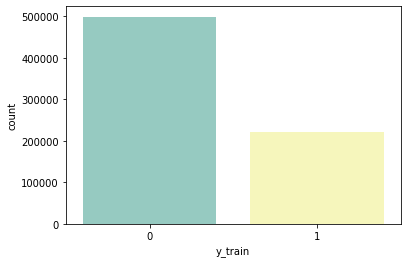

In [16]:
sns.countplot(train_y.iloc[:,0], palette='Set3')

### Проверим, что у нас нет дубликатов


In [17]:
train_df.duplicated().sum()

0

### Что-то надо делать с пропусками, посмотрим для начала , если ввобще от них избавиться:

In [18]:
train_df.dropna().shape, train_df.shape

((1985, 58), (720000, 58))

In [19]:
test_df.dropna().shape, test_df.shape

((477, 58), (180000, 58))

In [20]:
### Совсем трагически сократилось

In [21]:
train_y.shape,train_df.shape

((720000, 1), (720000, 58))

### Отложим сет для валидации

In [22]:
X, X_valid ,y , y_valid = train_test_split(train_df, train_y, random_state=42, test_size=.3,stratify=train_y)

In [23]:
X.shape, y.shape

((504000, 58), (504000, 1))

In [24]:
X_train, X_test ,y_train , y_test = train_test_split(X, y, random_state=42, test_size=.3,stratify=y)

In [25]:
X_train.shape, X_test.shape ,y_train.shape , y_test.shape

((352800, 58), (151200, 58), (352800, 1), (151200, 1))

In [26]:
X_train_temp=X_train.copy()

In [283]:
X_train_temp.shape

(352800, 58)

### Заменим пропущенные значения, на средние и посомтрим на данные вниматиельнее

In [259]:
X_train=X_train_temp.copy()

In [260]:
X_train=X_train.fillna(X_train.mean())

#### Данные тотчно нуждаются в какой-то нормализации

In [265]:

X_train.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58
count,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.00000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000,352800.000000
mean,11.218666,12.331067,11.340795,25.438739,0.312465,2.181972,23.224096,-46.283825,7.904285,0.269675,18.974630,-0.030099,34.284024,-75.841003,17.021505,-10.160639,16.487318,3.260236,-12.343252,-0.476126,3.99967,4.529936,1.943849,5.241765,-4.202722,13.804530,12.942814,51.504900,3.086855,0.481405,3.700055,3.675973,12.470633,94.027738,-40.149500,3.567220,13.387436,58.203872,-6.125712,-16.375805,-16.263338,1.010757,33.451323,0.873964,10.856588,-22.387119,0.180783,4.154676,20.613756,2.984242,14.680949,24.084334,-19.232122,16.348955,-25.808135,26.144721,38.316364,-36.988614
std,95.518421,0.754774,1.597425,19.772059,0.511786,0.724024,0.812147,18.714932,1.240621,0.416775,46.486018,55.250512,46.052362,34.642211,1.488022,6.723245,1.610508,1.480036,46.571966,16.220748,1.89030,1.599890,0.763783,1.817966,28.887549,1.977044,2.224280,8.308043,1.489901,0.629928,0.940998,1.408495,9.020512,31.416689,25.345590,1.581933,734.804758,44.796065,14.142934,16.955350,48.029444,2.904494,8.666380,0.738722,0.962542,33.602121,0.365954,1.592644,6.058146,1.056670,2.168953,28.201979,45.252148,42.860779,22.278909,8.089518,5.774943,14.255068
min,-480.088690,7.000000,3.000000,-72.310070,0.000000,0.000000,17.000000,-138.181159,1.000000,0.000000,-209.150651,-99.999949,-189.175571,-227.478011,8.000000,-42.982325,7.000000,0.000000,-219.210290,-83.560468,0.00000,0.000000,0.000000,0.000000,-144.661698,3.000000,2.000000,11.736310,0.000000,0.000000,0.000000,0.000000,-29.262014,-67.543979,-169.554805,0.000000,0.001178,-182.790369,-77.903990,-94.393365,-242.464534,-13.102334,-3.727775,0.000000,5.000000,-168.324702,0.000000,0.000000,-7.935290,0.000000,4.000000,-115.421307,-246.217734,-194.735471,-136.146509,-11.859427,12.499899,-112.352665
25%,-48.700883,12.000000,10.000000,12.959472,0.000000,2.000000,23.000000,-57.754115,7.000000,0.000000,-9.335972,-45.353734,5.832697,-97.674086,16.000000,-14.389007,16.000000,2.000000,-42.598005,-10.792038,3.00000,3.000000,1.943849,4.000000,-22.148190,13.000000,12.000000,46.335308,2.000000,0.000000,3.000000,3.000000,6.847078,74.364977,-55.739020,3.000000,0.585064,30.273935,-14.964893,-26.634927,-46.991943,-0.850878,27.981777,0.000000,10.000000,-43.520026,0.000000,3.000000,16.891812,2.000000,13.000000,6.003904,-47.525979,-10.410130,-39.536018,21.108306,34.631862,-45.575036
50%,11.218666,12.331067,11.340795,25.438739,0.000000,2.000000,23.224096,-46.283825,8.000000,0.000000,18.974630,-0.030099,34.284024,-75.841003,17.000000,-10.160639,16.487318,3.000000,-12.343252,-0.476126,4.00000,4.529936,2.000000,5.000000,-4.202722,14.0

#### Никакой коррляциия как между данными так и между целевой перменной нет

In [273]:
corrs = pd.concat([X_train,y_train], axis=1).corr().abs().unstack().sort_values(kind="quicksort").reset_index()
corrs = corrs[corrs['level_0'] != corrs['level_1']]
corrs.tail(30)

,level_0,level_1,0
3392,feature_36,feature_26,0.004461
3393,feature_26,feature_36,0.004461
3394,feature_48,feature_43,0.004463
3395,feature_43,feature_48,0.004463
3396,y_train,feature_19,0.004470
3397,feature_19,y_train,0.004470
3398,feature_3,feature_11,0.004635
3399,feature_11,feature_3,0.004635
3400,feature_55,feature_19,0.004711
3401,feature_19,feature_55,0.004711


#### Посмотрим на боксплоты:

In [269]:
def draw_graph(DF,y,columns,graphs_in_raw):    
    rows=math.ceil(len(columns)/graphs_in_raw)
    f, axarr =plt.subplots(rows,graphs_in_raw,figsize=(24, 24))
    count=0
    for row in range(rows):
        for col in range(graphs_in_raw):
            try:
                sns.boxplot(x=y, y=DF[columns[count]], data=DF, showmeans=True,ax=axarr[row,col])
                axarr[row,col].set_title(columns[count])
                count+=1
            except:
                pass
    plt.tight_layout()
    plt.show()

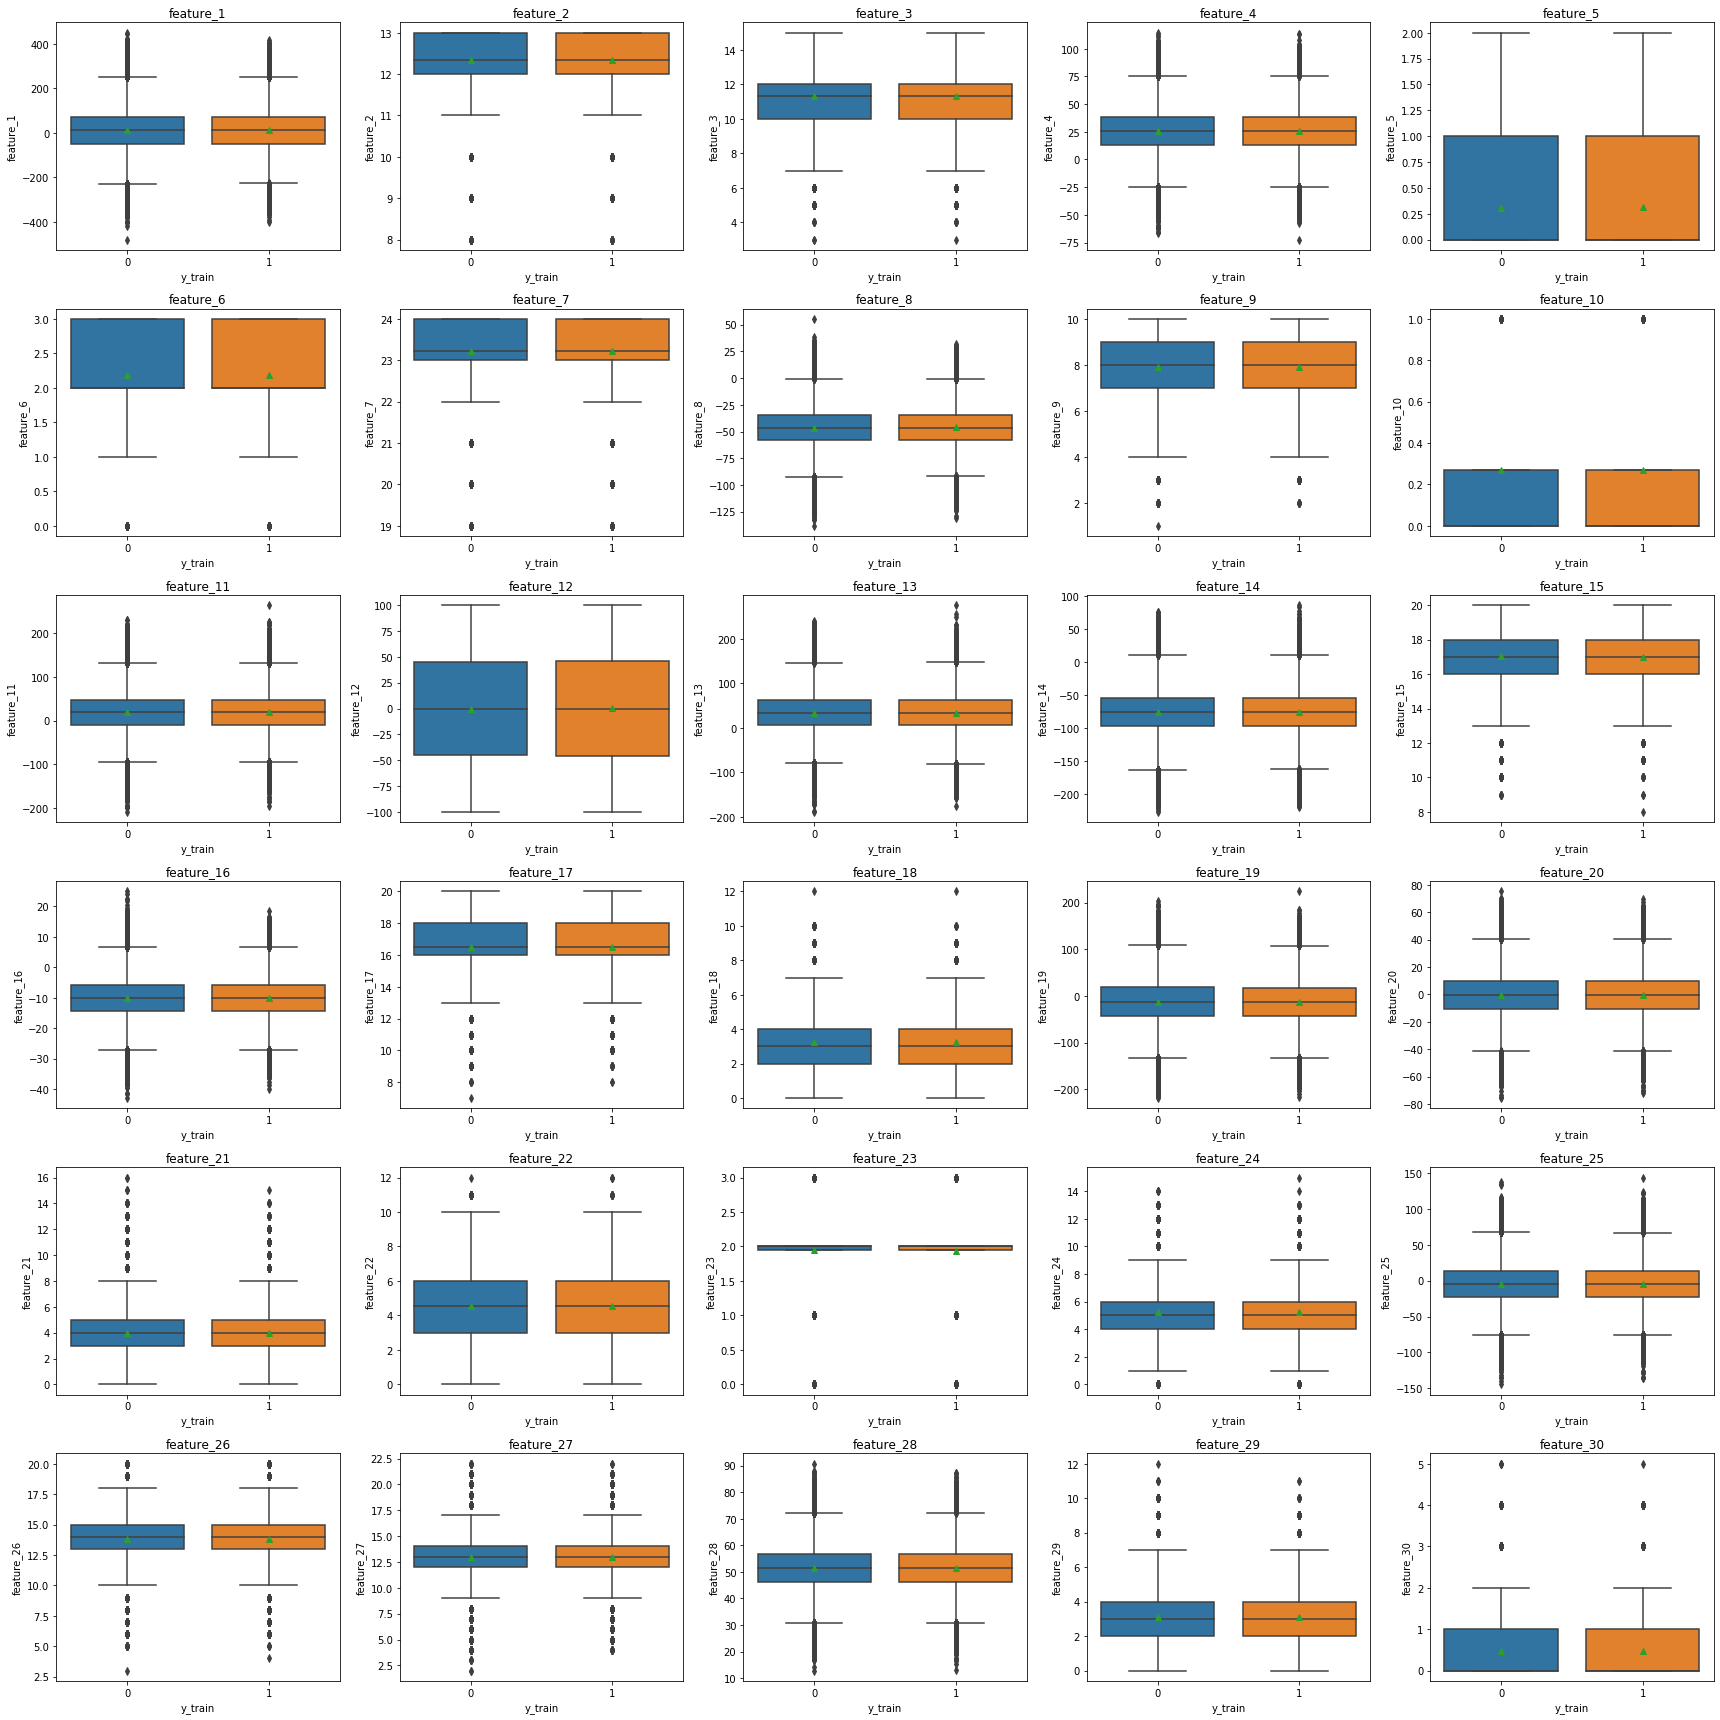

In [271]:
#видно например  num_var35,num_var4 должны нелохо делить классы
draw_graph(X_train,y_train.iloc[:,0],X_train.columns[:30],5)

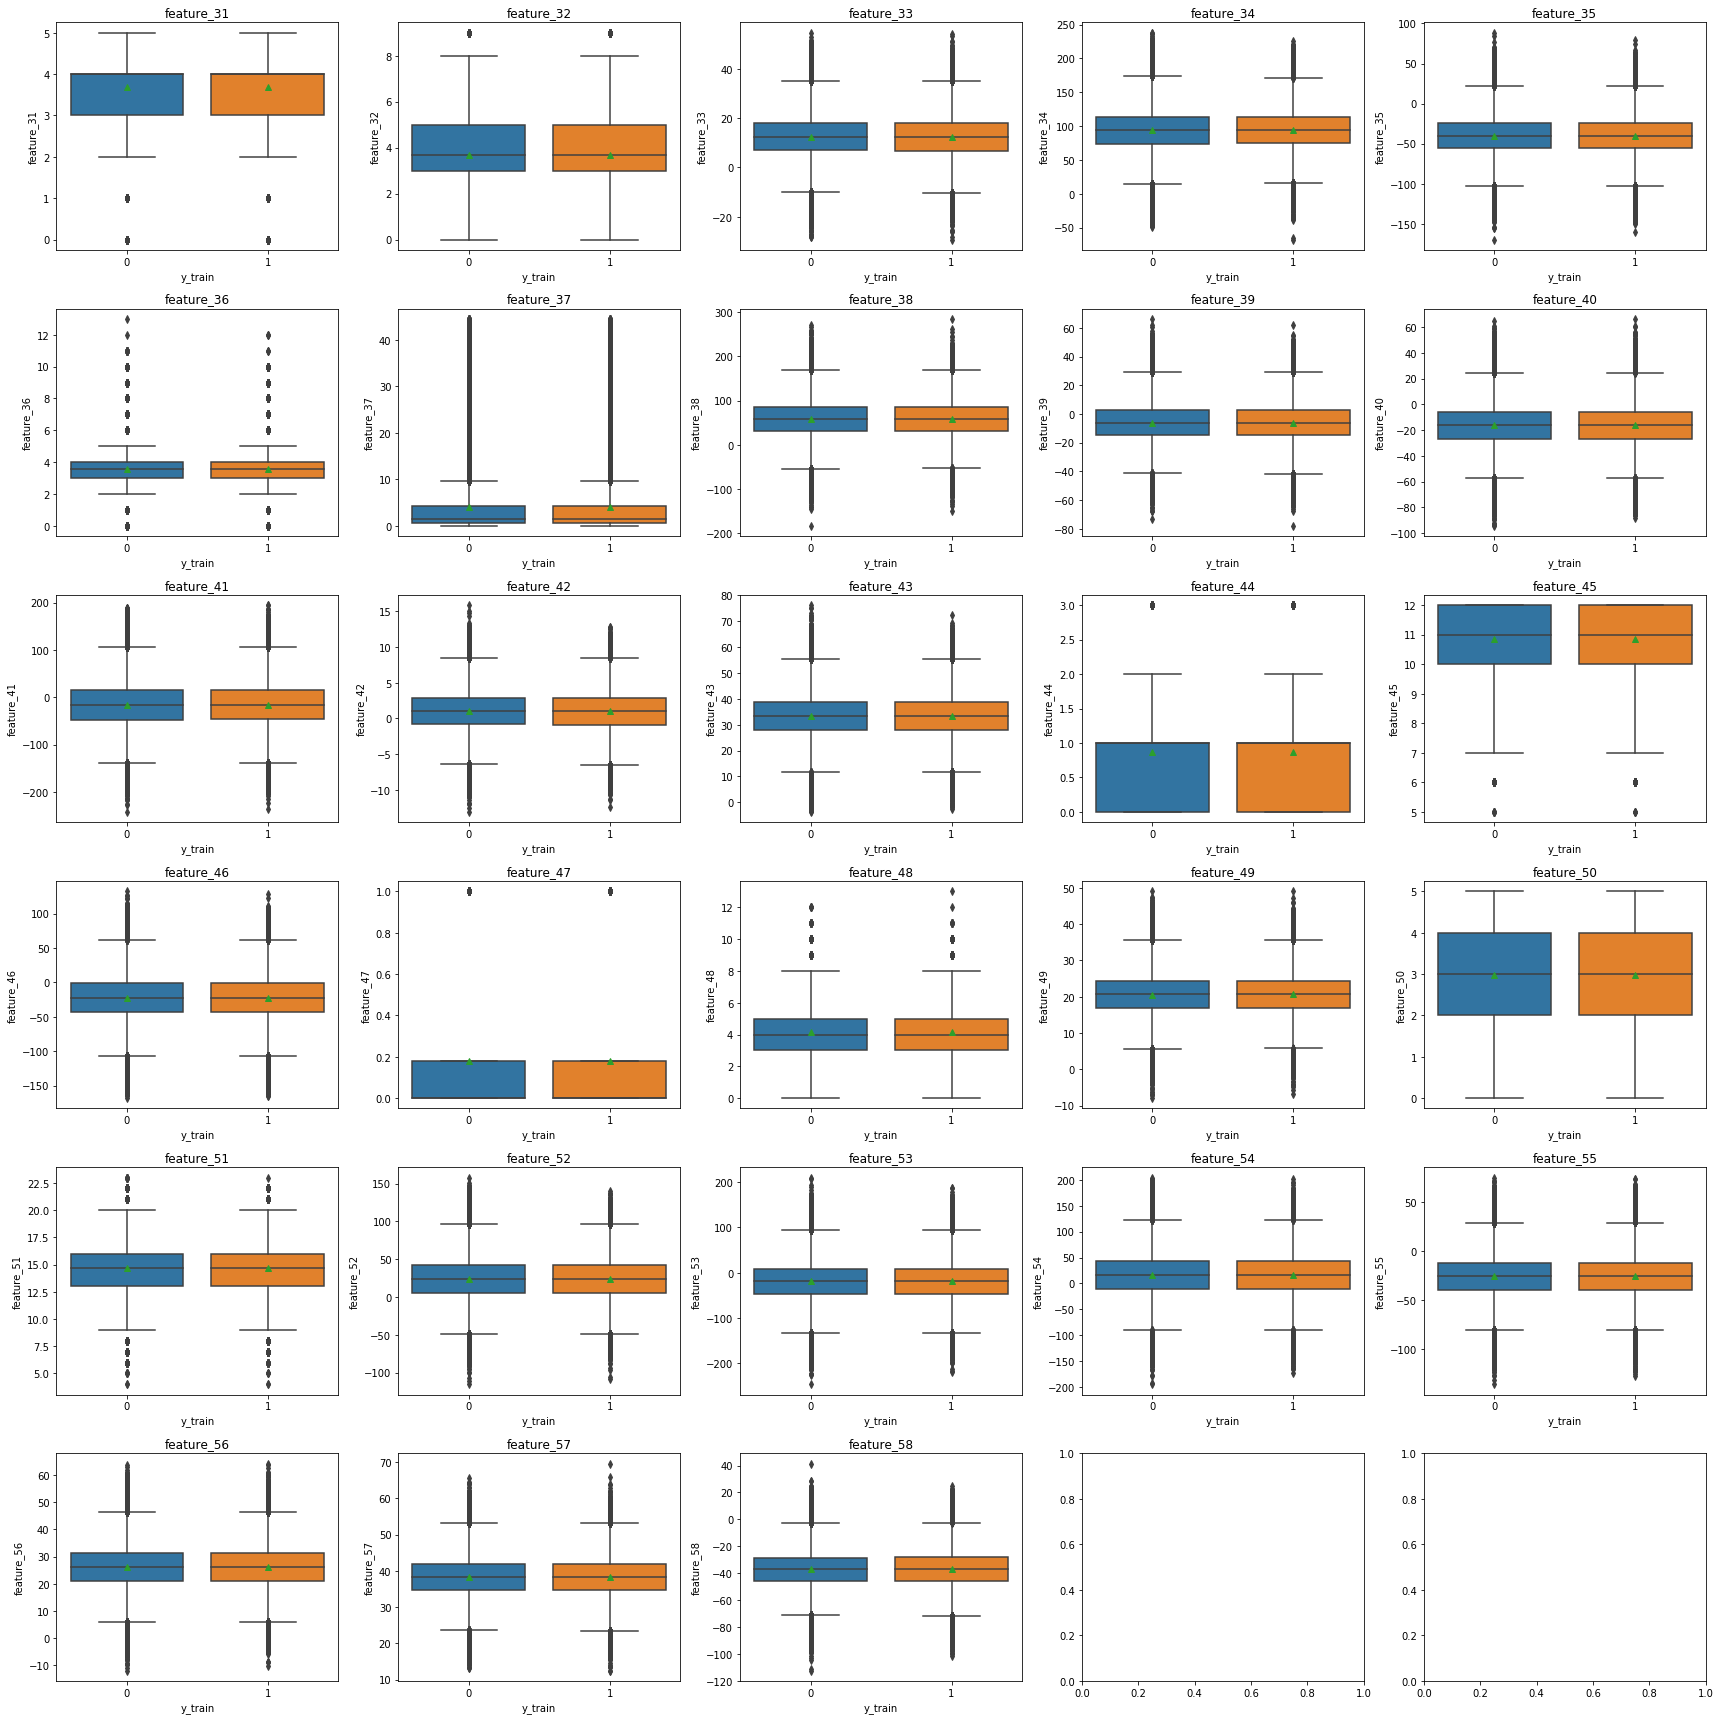

In [272]:
draw_graph(X_train,y_train.iloc[:,0],X_train.columns[30:],5)

In [ ]:
* на глаз не видно признаков, которые хорошо разделяли бы классы
* зато видно очень много выбросов

#### Посмотрим подробнее на ф-ции распределения фичей

In [279]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,6,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,6,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();

In [276]:
X_train_y=pd.concat([X_train,y_train], axis=1)

<Figure size 432x288 with 0 Axes>

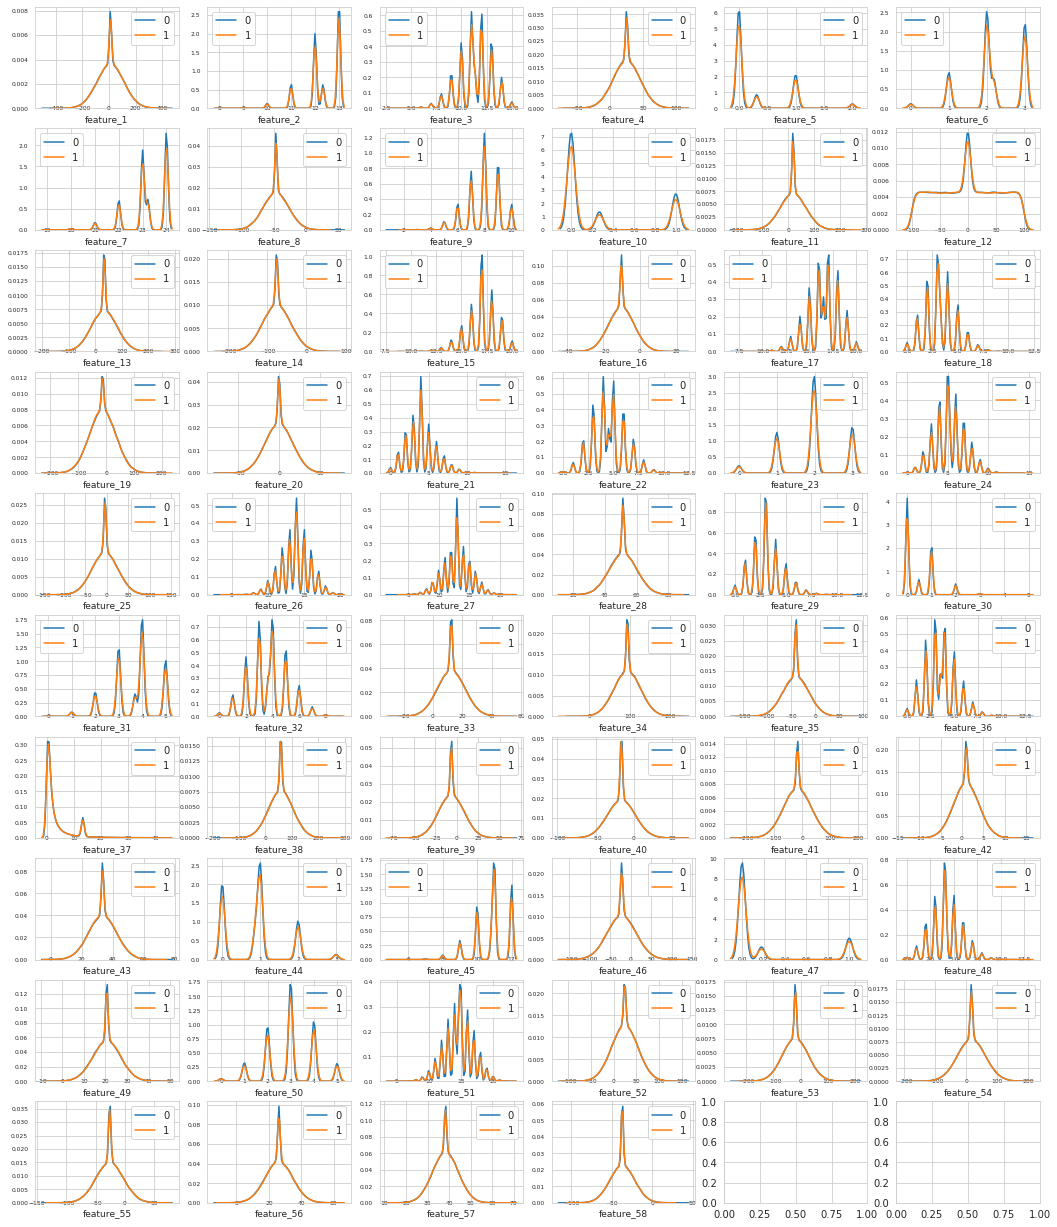

In [280]:
t0 = X_train_y.loc[X_train_y.y_train== 0]
t1 = X_train_y.loc[X_train_y.y_train == 1]
features = train_df.columns.values[2:102]
plot_feature_distribution(t0, t1, '0', '1', X_train)

In [ ]:
* почти у всеъ признаков распредление целевой переменой не отличается
* многие признаки смещенны или многомодальны
* острый наконечник можно объяснить, что Наны средним занимали

### Выберем способ масшитаюитрования данных и иетод заполнения пропущенных значений

#### Средние

In [27]:
X_train=X_train_temp.copy()

In [28]:
X_train=X_train.fillna(X_train.mean())


##### С помощью известной эвристики отбросим выбросы

In [29]:
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1

X_train_withiout_outliers  = X_train[~((X_train < (Q1-1.5 * IQR)) |(X_train > (Q3 + 1.5 * IQR))).any(axis=1)]
y_train_withiout_outliers=y_train.loc[X_train_withiout_outliers.index]

##### Почти 90 % наблюдений теряем

In [30]:
X_train_withiout_outliers.shape,y_train_withiout_outliers.shape

((37529, 58), (37529, 1))

In [31]:
from sklearn.preprocessing import Normalizer

In [32]:
nm=Normalizer()
X_train_norm = nm.fit_transform(X_train_withiout_outliers)
X_test_norm=nm.transform(X_test.fillna(X_test.mean()))

In [33]:
st = StandardScaler()
X_train_st = st.fit_transform(X_train_withiout_outliers)
X_test_st=st.transform(X_test.fillna(X_test.mean()))

In [34]:
min_max= MinMaxScaler()
X_train_minmax = min_max.fit_transform(X_train_withiout_outliers)
#X_minmax=pd.DataFrame(X_minmax,columns=X_train_withiout_outliers.columns)
X_test_minmax=min_max.transform(X_test.fillna(X_test.mean()))


In [35]:
results=pd.DataFrame(columns=['model','mean_cv_train_score','test_score'])

In [36]:
Xes=['norm','st','minmax']

In [37]:
%%time
#Xes=['norm','st','minmax']
for Xes in Xes:  
    globals()['xgb_'+Xes] = xgboost.XGBClassifier(n_jobs=-1)
    eval('xgb_'+Xes).fit(eval('X_train_'+Xes), y_train_withiout_outliers)
    globals()['cv_'+Xes]=cross_val_score(xgboost.XGBClassifier(n_jobs=-1), eval('X_train_'+Xes), y_train_withiout_outliers, scoring='roc_auc',cv=10,n_jobs=-1)
    results = results.append({'model' : 'cv_'+Xes , 'mean_cv_train_score' : eval('cv_'+Xes).mean(),'test_score':metrics.roc_auc_score(y_test, eval('xgb_'+Xes).predict_proba(eval('X_test_'+Xes))[:, 1])} , ignore_index=True)

CPU times: user 48.8 s, sys: 573 ms, total: 49.4 s
Wall time: 37.7 s


#### НУЛИ

In [39]:
X_train=X_train_temp.copy()

In [40]:
X_train=X_train.fillna(0)


In [41]:
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1

X_train_withiout_outliers  = X_train[~((X_train < (Q1-1.5 * IQR)) |(X_train > (Q3 + 1.5 * IQR))).any(axis=1)]
y_train_withiout_outliers=y_train.loc[X_train_withiout_outliers.index]

In [42]:
X_train_withiout_outliers.shape,y_train_withiout_outliers.shape

((30723, 58), (30723, 1))

In [43]:
from sklearn.preprocessing import Normalizer

In [44]:
nm=Normalizer()
X_train_norm = nm.fit_transform(X_train_withiout_outliers)
X_test_norm=nm.transform(X_test.fillna(0))

In [45]:
st = StandardScaler()
X_train_st = st.fit_transform(X_train_withiout_outliers)
X_test_st=st.transform(X_test.fillna(0))

In [46]:
min_max= MinMaxScaler()
X_train_minmax = min_max.fit_transform(X_train_withiout_outliers)

X_test_minmax=min_max.transform(X_test.fillna(0))


In [47]:
Xes=['norm','st','minmax']

In [48]:
%%time
#Xes=['norm','st','minmax']
for Xes in Xes:  
    globals()['xgb_zero_'+Xes] = xgboost.XGBClassifier(n_jobs=-1)
    eval('xgb_zero_'+Xes).fit(eval('X_train_'+Xes), y_train_withiout_outliers)  
    
    globals()['cv_zero_'+Xes]=cross_val_score(xgboost.XGBClassifier(n_jobs=-1), eval('X_train_'+Xes), y_train_withiout_outliers, scoring='roc_auc',cv=3,n_jobs=-1)
    results = results.append({'model' : 'cv_zero_'+Xes , 'mean_cv_train_score' : eval('cv_zero_'+Xes).mean(),'test_score':metrics.roc_auc_score(y_test, eval('xgb_zero_'+Xes).predict_proba(eval('X_test_'+Xes))[:, 1])} , ignore_index=True)

CPU times: user 41.2 s, sys: 188 ms, total: 41.4 s
Wall time: 15.5 s


#### Медиана

In [50]:
X_train=X_train_temp.copy()

In [51]:
X_train=X_train.fillna(X_train.median())


In [52]:
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1

X_train_withiout_outliers  = X_train[~((X_train < (Q1-1.5 * IQR)) |(X_train > (Q3 + 1.5 * IQR))).any(axis=1)]
y_train_withiout_outliers=y_train.loc[X_train_withiout_outliers.index]

In [53]:
X_train_withiout_outliers.shape,y_train_withiout_outliers.shape

((38919, 58), (38919, 1))

In [54]:
from sklearn.preprocessing import Normalizer

In [55]:
nm=Normalizer()
X_train_norm = nm.fit_transform(X_train_withiout_outliers)
X_test_norm=nm.transform(X_test.fillna(X_test.median()))

In [56]:
st = StandardScaler()
X_train_st = st.fit_transform(X_train_withiout_outliers)
X_test_st=st.transform(X_test.fillna(X_test.median()))

In [57]:
min_max= MinMaxScaler()
X_train_minmax = min_max.fit_transform(X_train_withiout_outliers)
#X_minmax=pd.DataFrame(X_minmax,columns=X_train_withiout_outliers.columns)
X_test_minmax=min_max.transform(X_test.fillna(X_test.median()))


In [58]:
Xes=['norm','st','minmax']

In [59]:
%%time
#Xes=['norm','st','minmax']
for Xes in Xes:  
    globals()['xgb_median_'+Xes] = xgboost.XGBClassifier(n_jobs=-1)
    eval('xgb_median_'+Xes).fit(eval('X_train_'+Xes), y_train_withiout_outliers)  
    globals()['cv_median_'+Xes]=cross_val_score(xgboost.XGBClassifier(n_jobs=-1), eval('X_train_'+Xes), y_train_withiout_outliers, scoring='roc_auc',cv=3,n_jobs=-1)
    results = results.append({'model' : 'cv_median_'+Xes , 'mean_cv_train_score' : eval('cv_median_'+Xes).mean(),'test_score':metrics.roc_auc_score(y_test, eval('xgb_median_'+Xes).predict_proba(eval('X_test_'+Xes))[:, 1])} , ignore_index=True)

CPU times: user 50.9 s, sys: 156 ms, total: 51 s
Wall time: 19.7 s


In [61]:
results_0_25_0_75=results

In [62]:
results_0_25_0_75

,model,mean_cv_train_score,test_score
0,cv_norm,0.495434,0.502634
1,cv_st,0.738323,0.653470
2,cv_minmax,0.738436,0.653469
3,cv_zero_norm,0.497446,0.499834
4,cv_zero_st,0.711433,0.648620
5,cv_zero_minmax,0.711435,0.648620
6,cv_median_norm,0.496371,0.498590
7,cv_median_st,0.736271,0.652983
8,cv_median_minmax,0.735355,0.652982


### Не очень это хорошо, что мы выбрасаваем так много наблденеий, к тому же видно, что модель сильно переобучается
#### Попробуем уменьшить порог отсечения выбросов

#### Средние

In [63]:
X_train=X_train_temp.copy()

In [64]:
X_train=X_train.fillna(X_train.mean())


In [65]:
Q1 = X_train.quantile(0.05)
Q3 = X_train.quantile(0.95)
IQR = Q3 - Q1

X_train_withiout_outliers  = X_train[~((X_train < (Q1-1.5 * IQR)) |(X_train > (Q3 + 1.5 * IQR))).any(axis=1)]
y_train_withiout_outliers=y_train.loc[X_train_withiout_outliers.index]

In [66]:
X_train_withiout_outliers.shape,y_train_withiout_outliers.shape

((345004, 58), (345004, 1))

In [67]:
from sklearn.preprocessing import Normalizer

In [68]:
nm=Normalizer()
X_train_norm = nm.fit_transform(X_train_withiout_outliers)
X_test_norm=nm.transform(X_test.fillna(X_test.mean()))

In [69]:
st = StandardScaler()
X_train_st = st.fit_transform(X_train_withiout_outliers)
X_test_st=st.transform(X_test.fillna(X_test.mean()))

In [70]:
min_max= MinMaxScaler()
X_train_minmax = min_max.fit_transform(X_train_withiout_outliers)
#X_minmax=pd.DataFrame(X_minmax,columns=X_train_withiout_outliers.columns)
X_test_minmax=min_max.transform(X_test.fillna(X_test.mean()))


In [71]:
results=pd.DataFrame(columns=['model','mean_cv_train_score','test_score'])

In [72]:
Xes=['norm','st','minmax']

In [73]:
%%time
#Xes=['norm','st','minmax']
for Xes in Xes:  
    globals()['xgb_'+Xes] = xgboost.XGBClassifier(n_jobs=-1)
    eval('xgb_'+Xes).fit(eval('X_train_'+Xes), y_train_withiout_outliers)
    globals()['cv_'+Xes]=cross_val_score(xgboost.XGBClassifier(n_jobs=-1), eval('X_train_'+Xes), y_train_withiout_outliers, scoring='roc_auc',cv=10,n_jobs=-1)
    results = results.append({'model' : 'cv_'+Xes , 'mean_cv_train_score' : eval('cv_'+Xes).mean(),'test_score':metrics.roc_auc_score(y_test, eval('xgb_'+Xes).predict_proba(eval('X_test_'+Xes))[:, 1])} , ignore_index=True)

CPU times: user 6min 42s, sys: 1.32 s, total: 6min 43s
Wall time: 11min 8s


#### НУЛИ

In [75]:
X_train=X_train_temp.copy()

In [77]:
X_train=X_train.fillna(0)


In [78]:
Q1 = X_train.quantile(0.05)
Q3 = X_train.quantile(0.95)
IQR = Q3 - Q1

X_train_withiout_outliers  = X_train[~((X_train < (Q1-1.5 * IQR)) |(X_train > (Q3 + 1.5 * IQR))).any(axis=1)]
y_train_withiout_outliers=y_train.loc[X_train_withiout_outliers.index]

In [79]:
X_train_withiout_outliers.shape,y_train_withiout_outliers.shape

((345063, 58), (345063, 1))

In [80]:
from sklearn.preprocessing import Normalizer

In [81]:
nm=Normalizer()
X_train_norm = nm.fit_transform(X_train_withiout_outliers)
X_test_norm=nm.transform(X_test.fillna(0))

In [82]:
st = StandardScaler()
X_train_st = st.fit_transform(X_train_withiout_outliers)
X_test_st=st.transform(X_test.fillna(0))

In [83]:
min_max= MinMaxScaler()
X_train_minmax = min_max.fit_transform(X_train_withiout_outliers)

X_test_minmax=min_max.transform(X_test.fillna(0))


In [84]:
Xes=['norm','st','minmax']

In [85]:
%%time
#Xes=['norm','st','minmax']
for Xes in Xes:  
    globals()['xgb_zero_'+Xes] = xgboost.XGBClassifier(n_jobs=-1)
    eval('xgb_zero_'+Xes).fit(eval('X_train_'+Xes), y_train_withiout_outliers)  
    
    globals()['cv_zero_'+Xes]=cross_val_score(xgboost.XGBClassifier(n_jobs=-1), eval('X_train_'+Xes), y_train_withiout_outliers, scoring='roc_auc',cv=3,n_jobs=-1)
    results = results.append({'model' : 'cv_zero_'+Xes , 'mean_cv_train_score' : eval('cv_zero_'+Xes).mean(),'test_score':metrics.roc_auc_score(y_test, eval('xgb_zero_'+Xes).predict_proba(eval('X_test_'+Xes))[:, 1])} , ignore_index=True)

CPU times: user 6min 40s, sys: 1.53 s, total: 6min 41s
Wall time: 3min 17s


#### Медиана

In [87]:
X_train=X_train_temp.copy()


In [95]:
X_train=X_train.fillna(X_train.median())


In [96]:
Q1 = X_train.quantile(0.05)
Q3 = X_train.quantile(0.95)
IQR = Q3 - Q1

X_train_withiout_outliers  = X_train[~((X_train < (Q1-1.5 * IQR)) |(X_train > (Q3 + 1.5 * IQR))).any(axis=1)]
y_train_withiout_outliers=y_train.loc[X_train_withiout_outliers.index]

In [97]:
X_train_withiout_outliers.shape,y_train_withiout_outliers.shape

((345004, 58), (345004, 1))

In [99]:
nm=Normalizer()
X_train_norm = nm.fit_transform(X_train_withiout_outliers)
X_test_norm=nm.transform(X_test.fillna(X_test.median()))

In [100]:
st = StandardScaler()
X_train_st = st.fit_transform(X_train_withiout_outliers)
X_test_st=st.transform(X_test.fillna(X_test.median()))

In [101]:
min_max= MinMaxScaler()
X_train_minmax = min_max.fit_transform(X_train_withiout_outliers)
#X_minmax=pd.DataFrame(X_minmax,columns=X_train_withiout_outliers.columns)
X_test_minmax=min_max.transform(X_test.fillna(X_test.median()))


In [102]:
Xes=['norm','st','minmax']

In [103]:
%%time

for Xes in Xes:  
    globals()['xgb_median_'+Xes] = xgboost.XGBClassifier(n_jobs=-1)
    eval('xgb_median_'+Xes).fit(eval('X_train_'+Xes), y_train_withiout_outliers)  
    globals()['cv_median_'+Xes]=cross_val_score(xgboost.XGBClassifier(n_jobs=-1), eval('X_train_'+Xes), y_train_withiout_outliers, scoring='roc_auc',cv=3,n_jobs=-1)
    results = results.append({'model' : 'cv_median_'+Xes , 'mean_cv_train_score' : eval('cv_median_'+Xes).mean(),'test_score':metrics.roc_auc_score(y_test, eval('xgb_median_'+Xes).predict_proba(eval('X_test_'+Xes))[:, 1])} , ignore_index=True)

CPU times: user 6min 50s, sys: 1.37 s, total: 6min 51s
Wall time: 3min 9s


In [104]:
# результы для порога остчения 0.05_0.95
results.sort_values('test_score',ascending=0)

,model,mean_cv_train_score,test_score
4,cv_zero_st,0.681069,0.680788
5,cv_zero_minmax,0.681071,0.680663
7,cv_median_st,0.684815,0.669941
8,cv_median_minmax,0.684804,0.669941
1,cv_st,0.682779,0.668768
2,cv_minmax,0.683327,0.668420
0,cv_norm,0.500071,0.500462
6,cv_median_norm,0.497966,0.499475
3,cv_zero_norm,0.497550,0.499308


In [105]:
# результы для порога остчения 0.25_0.95
results_0_25_0_75.sort_values('test_score',ascending=0)

,model,mean_cv_train_score,test_score
1,cv_st,0.738323,0.653470
2,cv_minmax,0.738436,0.653469
7,cv_median_st,0.736271,0.652983
8,cv_median_minmax,0.735355,0.652982
4,cv_zero_st,0.711433,0.648620
5,cv_zero_minmax,0.711435,0.648620
0,cv_norm,0.495434,0.502634
3,cv_zero_norm,0.497446,0.499834
6,cv_median_norm,0.496371,0.498590


* тестовые результаты улучшились
* мы почти не переобучамся
* выберем как стетегию замену Nan  нулями и стандартизацию

In [ ]:
X_train=X_train_temp.copy()

In [106]:
X_train=X_train.fillna(0)

In [145]:
X_test=np.array(pd.DataFrame(X_test).fillna(0))

In [107]:
Q1 = X_train.quantile(0.05)
Q3 = X_train.quantile(0.95)
IQR = Q3 - Q1

X_train_withiout_outliers  = X_train[~((X_train < (Q1-1.5 * IQR)) |(X_train > (Q3 + 1.5 * IQR))).any(axis=1)]
y_train_withiout_outliers=y_train.loc[X_train_withiout_outliers.index]

In [108]:
X_train_withiout_outliers.shape,y_train_withiout_outliers.shape

((345004, 58), (345004, 1))

In [109]:
from sklearn.preprocessing import Normalizer

In [111]:
st = StandardScaler()
X_train = st.fit_transform(X_train_withiout_outliers)
X_test=st.transform(X_test.fillna(0))

In [112]:
y_train=y_train_withiout_outliers

In [114]:
y_train.shape, X_train.shape

((345004, 1), (345004, 58))

### Попрбуем PCA

In [120]:
components = 55
pca = PCA(n_components=components).fit(X_train)
#X_PCA_st=pd.DataFrame(PCA(n_components=components).fit_transform(X_st))
sum(pca.explained_variance_ratio_)

0.9494714511714248

In [118]:
components = 50
pca = PCA(n_components=components).fit(X_train)
#X_PCA_st=pd.DataFrame(PCA(n_components=components).fit_transform(X_st))
sum(pca.explained_variance_ratio_)

0.8648706457182662

In [119]:
components = 40
pca = PCA(n_components=components).fit(X_train)
#X_PCA_st=pd.DataFrame(PCA(n_components=components).fit_transform(X_st))
sum(pca.explained_variance_ratio_)

0.692657620551349

In [121]:
components = 30
pca = PCA(n_components=components).fit(X_train)
#X_PCA_st=pd.DataFrame(PCA(n_components=components).fit_transform(X_st))
sum(pca.explained_variance_ratio_)

0.5199309904046481

In [124]:
components = 50
pca = PCA(n_components=components).fit(X_train)
X_train_PCA_st=pca.fit_transform(X_train)
X_test_PCA_st=pca.transform(X_test)

In [125]:
%time
Xes=['st']
for Xes in Xes:  
    globals()['xgb_PCA_'+Xes] = xgboost.XGBClassifier(n_jobs=-1)
    eval('xgb_PCA_'+Xes).fit(eval('X_train_PCA_'+Xes), y_train)
    globals()['cv_PCA_'+Xes]=cross_val_score(xgboost.XGBClassifier(n_jobs=-1), eval('X_train_PCA_'+Xes), y_train, scoring='roc_auc',cv=10,n_jobs=-1)
    results = results.append({'model' : 'cv_PCA_'+Xes , 'mean_cv_train_score' : eval('cv_PCA_'+Xes).mean(),'test_score':metrics.roc_auc_score(y_test, eval('xgb_PCA_'+Xes).predict_proba(eval('X_test_PCA_'+Xes))[:, 1])} , ignore_index=True)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10.3 µs


In [127]:
results.sort_values('test_score',ascending=0)

,model,mean_cv_train_score,test_score
4,cv_zero_st,0.681069,0.680788
5,cv_zero_minmax,0.681071,0.680663
7,cv_median_st,0.684815,0.669941
8,cv_median_minmax,0.684804,0.669941
1,cv_st,0.682779,0.668768
2,cv_minmax,0.683327,0.668420
9,cv_PCA_st,0.499766,0.500987
0,cv_norm,0.500071,0.500462
6,cv_median_norm,0.497966,0.499475
3,cv_zero_norm,0.497550,0.499308


* PCA сильно ухудщает реузльтаты, длаже при небольшом сокращении размерности пространсва

### Feature Selction

In [ ]:

%%time
Xes=['st']
for Xes in Xes:
    globals()['cv_zero_st_rfecv_'+Xes] = RFECV(estimator=xgboost.XGBClassifier(n_jobs=-1) , step=1, cv=3,scoring='roc_auc',n_jobs=-1

In [130]:
cv_zero_st_rfecv_st=RFECV(estimator=xgboost.XGBClassifier(n_jobs=-1) , step=1, cv=3,scoring='roc_auc',n_jobs=-1)

In [132]:
cv_zero_st_rfecv_st.fit(X_train, y_train)

RFECV(cv=3,
      estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, learning_rate=0.1,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              missing=None, n_estimators=100, n_jobs=-1,
                              nthread=None, objective='binary:logistic',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, seed=None, silent=None,
                              subsample=1, verbosity=1),
      min_features_to_select=1, n_jobs=-1, scoring='roc_auc', step=1,
      verbose=0)

In [161]:
#RFECV отобрал всего четыре признака
cv_zero_st_rfecv_st.get_support()

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [158]:
 results = results.append({'model' : 'ccv_zero_st_rfecv_st' , 'mean_cv_train_score' : cv_zero_st_rfecv_st.grid_scores_.mean(),'test_score':metrics.roc_auc_score(y_test, cv_zero_st_rfecv_st.predict_proba(X_test)[:, 1])} , ignore_index=True)

In [159]:
results.sort_values('test_score',ascending=0)

,model,mean_cv_train_score,test_score
10,ccv_zero_st_rfecv_st,0.684356,0.681125
4,cv_zero_st,0.681069,0.680788
5,cv_zero_minmax,0.681071,0.680663
7,cv_median_st,0.684815,0.669941
8,cv_median_minmax,0.684804,0.669941
1,cv_st,0.682779,0.668768
2,cv_minmax,0.683327,0.668420
9,cv_PCA_st,0.499766,0.500987
0,cv_norm,0.500071,0.500462
6,cv_median_norm,0.497966,0.499475


* однако с 4 призанками модель стала только лучше

### Отберем эти 4 призака и обучим зоопарк моделей:

In [171]:
X_train_selected_features=X_train[:,cv_zero_st_rfecv_st.get_support()]
X_test_selected_features=X_test[:,cv_zero_st_rfecv_st.get_support()]

#### Logistic Regression


In [175]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [177]:
lr_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 0.25, 0.5]
}

In [185]:
%%time
lr = LogisticRegression()
grid_lr = GridSearchCV(lr, lr_params, scoring='roc_auc', cv=3,n_jobs=-1)
grid_lr.fit(X_train_selected_features, y_train)

CPU times: user 946 ms, sys: 2.48 s, total: 3.43 s
Wall time: 2.51 s


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.25, 0.5],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [186]:
print(grid_lr.best_params_)
print(grid_lr.best_score_)
print(grid_lr.best_estimator_)


{'C': 0.25, 'penalty': 'l2'}
0.49981273526622694
LogisticRegression(C=0.25, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


#### KNN

In [191]:

knn_params = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'p': [1, 2]
}

In [192]:
%%time
knn = KNeighborsClassifier(metric='minkowski')
grid_knn = GridSearchCV(knn, knn_params, scoring='roc_auc', cv=3,n_jobs=-1)
grid_knn.fit(X_train_selected_features, y_train)

CPU times: user 1.47 s, sys: 696 ms, total: 2.16 s
Wall time: 22.2 s


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9], 'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [193]:

print(grid_knn.best_params_)
print(grid_knn.best_score_)
print(grid_knn.best_estimator_)

{'n_neighbors': 9, 'p': 1}
0.7011541808903866
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                     weights='uniform')


#### Decision Tree

In [198]:
tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 3, 5, 7, 9, None],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}

In [199]:
%%time
tree = DecisionTreeClassifier()
grid_tree = GridSearchCV(tree, tree_params, scoring='roc_auc', cv=3,n_jobs=-1)
grid_tree.fit(X_train_selected_features, y_train)

CPU times: user 3.7 s, sys: 116 ms, total: 3.81 s
Wall time: 30.6 s


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [200]:

print(grid_tree.best_params_)
print(grid_tree.best_score_)
print(grid_tree.best_estimator_)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 16}
0.7393272566340111
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=16, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


#### RandomForest

In [202]:
forest_params = {
    'n_estimators': [5, 10, 20, 40],
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 3, 5, 7, 9, None],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}

In [205]:
%%time
forest = RandomForestClassifier()
grid_forest = GridSearchCV(forest, forest_params, scoring='roc_auc', cv=3,n_jobs=-1)
grid_forest.fit(X_train_selected_features, y_train)


CPU times: user 1min 25s, sys: 1.19 s, total: 1min 26s
Wall time: 15min 11s


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [206]:
print(grid_forest.best_params_)
print(grid_forest.best_score_)
print(grid_forest.best_estimator_)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 8, 'n_estimators': 40}
0.7710994245359976
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


#### GradientBoosting

In [207]:

%%time
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
gb_params = {
          'n_estimators': [1,10,20,30,40,50,60,80,90],
          'max_features': list(range(1, 16)),
             'max_depth':[None,1,2,5,10,25,50],
            'learning_rate': [0.1,0.3,0.5,0.7],
               #'min_samples_split':[2,5,8,10,25,50],
            'min_samples_leaf':list(range(1, 10)),
}

    

grid_gb =  RandomizedSearchCV(GradientBoostingClassifier(),gb_params,scoring='roc_auc',
                       cv=3,n_jobs=-1)
grid_gb.fit(X_train_selected_features, y_train)
print(grid_gb.best_params_)
print(grid_gb.best_score_)
print(grid_gb.best_estimator_)

{'n_estimators': 60, 'min_samples_leaf': 1, 'max_features': 1, 'max_depth': 25, 'learning_rate': 0.1}
0.7533170315813784
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=25,
                           max_features=1, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=60,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
CPU times: user 6min 55s, sys: 348 ms, total: 6min 55s
Wall time: 17min 57s


#### xgboost

In [208]:
%%time

XGB_params = {
           'max_depth': [2,3,4,5,6,7,8,25,50], # 5 is good but takes too long in kaggle env
    'subsample': [0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'colsample_bytree': [0.5,0.6,0.7,0.8,0.9,1],
    'n_estimators': [10,30,40,50,80,100,350,500,1000],
    'reg_alpha': [0,0.01, 0.02, 0.03, 0.04],
    'learning_rate':[0.01, 0.05,0.1,0.2]
}

    

grid_XGB =  RandomizedSearchCV(xgboost.XGBClassifier(n_jobs=-1),XGB_params,scoring='roc_auc',
                       cv=3,n_jobs=-1, verbose=10)
grid_XGB.fit(X_train_selected_features, y_train)
print(grid_XGB.best_params_)
print(grid_XGB.best_score_)
print(grid_XGB.best_estimator_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:   14.0s remaining:   24.2s
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:   18.3s remaining:   18.3s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:   22.4s remaining:   12.9s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   38.1s remaining:   11.6s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   51.7s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


{'subsample': 1.0, 'reg_alpha': 0.01, 'n_estimators': 100, 'max_depth': 25, 'learning_rate': 0.01, 'colsample_bytree': 0.9}
0.7425532519864668
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1)
CPU times: user 4min 6s, sys: 1.26 s, total: 4min 7s
Wall time: 1min 50s


### Посмотрим на  результаты на тестовой и  валидационной выборках ( раз параметры на кросс-валидации подбирали почти один смыcл они тут имеют)

In [209]:
estimators = {
    'regression': grid_lr,
    'knn': grid_knn,
    'tree': grid_tree,
    'forest': grid_forest,
    'gb': grid_gb,
    
    'XGB': grid_XGB,
    
}

In [226]:
X_valid_=X_valid.fillna(0)

In [228]:
X_valid_=st.transform(X_valid.fillna(0))

In [233]:
for k in estimators:
    v = estimators[k]
    print(k, " train CV roc_auc:", round(v.best_score_,4),
          "Test roc_auc:", round(v.best_estimator_.score(X_test_selected_features, y_test),4),
           "Validation roc_auc:",round(v.best_estimator_.score(X_valid_[:,cv_zero_st_rfecv_st.get_support()], y_valid),4))


regression  train CV roc_auc: 0.4998 Test roc_auc: 0.6933 Validation roc_auc: 0.6933
knn  train CV roc_auc: 0.7012 Test roc_auc: 0.7271 Validation roc_auc: 0.7265
tree  train CV roc_auc: 0.7393 Test roc_auc: 0.7226 Validation roc_auc: 0.7244
forest  train CV roc_auc: 0.7711 Test roc_auc: 0.7667 Validation roc_auc: 0.7679
gb  train CV roc_auc: 0.7533 Test roc_auc: 0.7473 Validation roc_auc: 0.7474
XGB  train CV roc_auc: 0.7426 Test roc_auc: 0.7424 Validation roc_auc: 0.7428


* Лучшеи результы показал случайны лес

### Зафитим случаный RandomForest и сохраним предсказанные вероятности

In [238]:
X_test_final=st.transform(test_df.fillna(0))[:,cv_zero_st_rfecv_st.get_support()]

In [242]:
y_test_final=grid_forest.best_estimator_.predict_proba(X_test_final)[:, 1]

In [249]:
pd.DataFrame(y_test_final, columns=['y_train']).to_csv('out.csv',index=False)

In [250]:
pd.read_csv('out.csv')

,y_train
0,0.307800
1,0.077642
2,0.213803
3,0.141888
4,0.364137
...,...
179995,0.012735
179996,0.709221
179997,0.401034
179998,0.256535


In [254]:
!ls -lah

total 1,6G
drwxr-xr-x  3 gavril gavril 4,0K мар 16 01:42  .
drwxr-xr-x 26 gavril gavril  36K мар 14 22:15  ..
drwxr-xr-x  2 gavril gavril 4,0K мар 15 17:09  .ipynb_checkpoints
-rw-r--r--  1 gavril gavril   74 мар 12 11:25 '.~lock.Тестовое задание.docx#'
-rw-r--r--  1 gavril gavril 3,4M мар 16 01:41  out.csv
-rw-r--r--  1 gavril gavril 111M дек 12  2018  test.csv
-rw-r--r--  1 gavril gavril  80M мар 14 20:25  test_df
-rw-r--r--  1 gavril gavril 444M дек 12  2018  train.csv
-rw-r--r--  1 gavril gavril 319M мар 14 20:25  train_df
-rw-r--r--  1 gavril gavril 319M мар 14 20:34  train_df_mean
-rw-r--r--  1 gavril gavril 674K мар 15 01:43  Untitled1.ipynb
-rw-r--r--  1 gavril gavril 109K мар 15 16:29  Untitled2.ipynb
-rw-r--r--  1 gavril gavril  85K мар 15 17:06  Untitled3.ipynb
-rw-r--r--  1 gavril gavril 190K мар 16 01:42  Untitled4.ipynb
-rw-r--r--  1 gavril gavril 453K мар 14 17:32  Untitled.ipynb
-rw-r--r--  1 gavril gavril 319M мар 15 01:50  X_train_mean
-rw-r--r--  1 gavril gavril 2,1M